<a href="https://colab.research.google.com/github/dharsanakb/FML/blob/main/FML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [ ]:
# Create dataset
data = {
    "Study_Hours": [1, 2, 3, 4, 5, 6],
    "Attendance": [60, 65, 70, 75, 80, 85],
    "Result": [0, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)
print(df)

   Study_Hours  Attendance  Result
0            1          60       0
1            2          65       0
2            3          70       0
3            4          75       1
4            5          80       1
5            6          85       1


In [ ]:
X = df[["Study_Hours", "Attendance"]]
y = df["Result"]

In [ ]:
# Base model
base_tree = DecisionTreeClassifier()

# Bagging classifier
bagging_model = BaggingClassifier(
    estimator=base_tree,
    n_estimators=10,
    bootstrap=True,
    random_state=42
)

# Train model
bagging_model.fit(X, y)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
# New student data
new_student = [[3.5, 72]]  # Study hours = 3.5, Attendance = 72%

prediction = bagging_model.predict(new_student)
print("Bagging Prediction:", "Pass" if prediction[0] == 1 else "Fail")

Bagging Prediction: Fail


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=10,
    random_state=42
)

# Train Random Forest
rf_model.fit(X, y)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_prediction = rf_model.predict(new_student)
print("Random Forest Prediction:", "Pass" if rf_prediction[0] == 1 else "Fail")

Random Forest Prediction: Fail


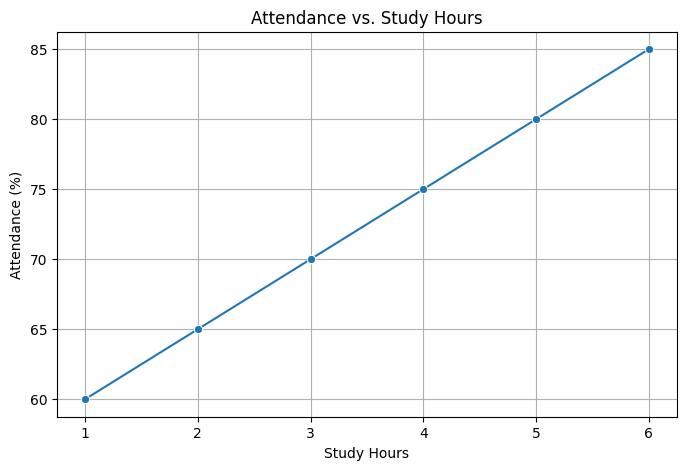

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Study_Hours', y='Attendance', data=df, marker='o')
plt.title('Attendance vs. Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Attendance (%)')
plt.grid(True)
plt.show()